### Action1：求2+4+6+8+...+100的求和，用Python该如何写

In [1]:
result = 0
temp = 2
while temp <= 100:
    result = result + temp
    temp = temp +2
print('所求算式和为：',result)

所求算式和为： 2550


### Action2: 统计全班的成绩
班里有5名同学，现在需要你用Python来统计下这些人在语文、英语、数学中的平均成绩、最小成绩、最大成绩、方差、标准差。然后把这些人的总成绩排序，得出名次进行成绩输出（可以用numpy或pandas）
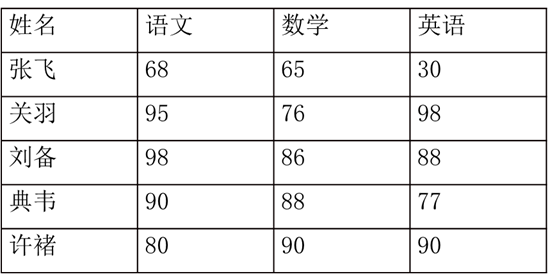

In [2]:
import pandas as pd
data = pd.DataFrame({'姓名':['张飞','关羽','刘备','典韦','许诸'],'语文':[68,95,98,90,80],'数学':[65,76,86,88,90],'英语':[30,98,88,77,90]})
data

,姓名,语文,数学,英语
0,张飞,68,65,30
1,关羽,95,76,98
2,刘备,98,86,88
3,典韦,90,88,77
4,许诸,80,90,90


In [3]:
data.describe().drop(['count'])

,语文,数学,英语
mean,86.200000,81.000000,76.600000
std,12.255611,10.440307,27.107195
min,68.000000,65.000000,30.000000
25%,80.000000,76.000000,77.000000
50%,90.000000,86.000000,88.000000
75%,95.000000,88.000000,90.000000
max,98.000000,90.000000,98.000000


In [4]:
data['总分'] = data.iloc[:,1:4].sum(axis=1)
data = data.sort_values(by='总分',ascending=False).reset_index().iloc[:,1:]
data

,姓名,语文,数学,英语,总分
0,刘备,98,86,88,272
1,关羽,95,76,98,269
2,许诸,80,90,90,260
3,典韦,90,88,77,255
4,张飞,68,65,30,163


### Action3: 对汽车质量数据进行统计
数据集：car_complain.csv
600条汽车质量投诉

#### Step1，数据加载

In [5]:
dataset = pd.read_csv('.\car_complain.csv')
dataset.head()

,id,brand,car_model,type,desc,problem,datetime,status
0,482028,一汽马自达,阿特兹,2020款 2.5L 蓝天运动版,一汽马自达阿特兹B柱异响 车内异响严重,"H93,H15,",2020-06-08,信息审核
1,482027,江淮汽车,江淮iEV6E,2017款 iEV6E,江淮iEV6E动力电池故障 无法充电,"H343,",2020-06-08,信息审核
2,482026,一汽马自达,阿特兹,2020款 2.5L 蓝天运动版,一汽马自达阿特兹车身异响 天窗异响,"H93,H15,H89,",2020-06-08,信息审核
3,482022,一汽-大众,迈腾,2009款 1.8TSI DSG 舒适型,一汽大众迈腾起步和刹车时车辆抖动\t,"B84,E111,",2020-06-08,信息审核
4,482019,众泰汽车,众泰T600 Coupe,2017款 1.5T 自动 尊享型,众泰T600 Coupe售后维修配件一直缺货,"N318,",2020-06-08,厂家受理


#### Step2，数据预处理
拆分problem类型 => 多个字段

In [6]:
dataset = dataset.join(dataset['problem'].str.get_dummies(sep = ',')).drop(['problem'],axis = 1)
dataset.head()

,id,brand,car_model,type,desc,datetime,status,A11,A114,A12,...,N318,N319,O296,O326,O348,O354,Q322,Q323,Q349,Q350
0,482028,一汽马自达,阿特兹,2020款 2.5L 蓝天运动版,一汽马自达阿特兹B柱异响 车内异响严重,2020-06-08,信息审核,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,482027,江淮汽车,江淮iEV6E,2017款 iEV6E,江淮iEV6E动力电池故障 无法充电,2020-06-08,信息审核,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,482026,一汽马自达,阿特兹,2020款 2.5L 蓝天运动版,一汽马自达阿特兹车身异响 天窗异响,2020-06-08,信息审核,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,482022,一汽-大众,迈腾,2009款 1.8TSI DSG 舒适型,一汽大众迈腾起步和刹车时车辆抖动\t,2020-06-08,信息审核,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,482019,众泰汽车,众泰T600 Coupe,2017款 1.5T 自动 尊享型,众泰T600 Coupe售后维修配件一直缺货,2020-06-08,厂家受理,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Step3，数据统计
对数据进行探索：品牌投诉总数，车型投诉总数
哪个品牌的平均车型投诉最多

In [7]:
dataset['brand'] = dataset['brand'].str.replace('-','')
tags = dataset.columns[7:]
result_brand = dataset.groupby(['brand'])[tags].agg(['sum'])
result_brand['投诉总数'] = result_brand.iloc[:,1:].sum(axis=1)
result_brand = result_brand.drop(result_brand.columns[:-1],axis=1).sort_values(by='投诉总数',ascending=False)
result_brand

,投诉总数
,
brand,
一汽马自达,193
吉利汽车,192
一汽大众,89
上汽大众,57
北京现代,40
...,...
绵阳金杯,1
开瑞汽车,1


In [8]:
result_car = dataset.groupby(['car_model'])[tags].agg(['sum'])
result_car['投诉总数'] = result_car.iloc[:,1:].sum(axis=1)
result_car = result_car.drop(result_car.columns[:-1],axis=1).sort_values(by='投诉总数',ascending=False)
result_car

,投诉总数
,
car_model,
阿特兹,152
星越,92
马自达CX-4,41
速腾,33
迈腾,22
...,...
红旗HS5,1
索纳塔八,1


In [9]:
result_brand_model = dataset.groupby(['brand','car_model'])[tags].agg(['sum'])
result_brand_model['投诉总数'] = result_brand_model.iloc[:,2:].sum(axis=1)
result_brand_model = result_brand_model.drop(result_brand_model.columns[:-1],axis=1).sort_values(by=['brand','投诉总数'],ascending=False)
result_brand_model = result_brand_model.reset_index()
result_brand_model = result_brand_model.groupby(['brand'])['投诉总数'].agg(['mean']).sort_values(by='mean',ascending=False)
result_brand_model

,mean
brand,
一汽马自达,96.500000
吉利汽车,19.200000
一汽大众,12.714286
广汽三菱,9.000000
广汽丰田,8.000000
...,...
开瑞汽车,1.000000
东风小康,1.000000
江铃汽车,1.000000
